In [44]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
%matplotlib inline
import re
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [49]:
agg_data = pd.read_csv('prestudy2/agg.csv')
agg_data = agg_data[agg_data['_golden'] == False]
agg_data['iteration'] = 1
agg_data['domain'] = '-'
print(agg_data.columns)
new_a = re.compile(r'[^>]+(?=:\[OBJECT_A\])')
new_b = re.compile(r'[^>]+(?=:\[OBJECT_B\])')
agg_data['a'] = agg_data.apply(lambda row:  new_a.findall(row['new_sentence'])[0], axis=1)
agg_data['b'] = agg_data.apply(lambda row:  new_b.findall(row['new_sentence'])[0], axis=1)
full_data = pd.read_csv('prestudy2/full.csv')
#full_data['_golden']

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'assigned_class', 'assigned_class:confidence',
       'assigned_class_gold', 'label', 'new_sentence', 'sentence', 'iteration',
       'domain'],
      dtype='object')


### Confidence

#### With Test Questions

In [16]:
agg_data[['assigned_class:confidence']].describe()

,assigned_class:confidence
count,200.000000
mean,0.868112
std,0.177531
min,0.355400
25%,0.676650
50%,1.000000
75%,1.000000
max,1.000000


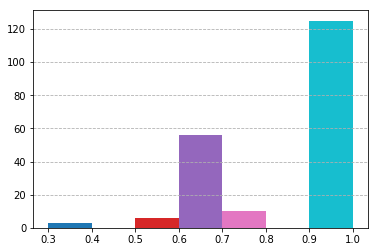

In [17]:
color_map = plt.cm.get_cmap('tab10')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    agg_data['assigned_class:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

In [50]:
agg_data

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,assigned_class,assigned_class:confidence,assigned_class_gold,label,new_sentence,sentence,iteration,domain,a,b
0,1445637774,False,finalized,3,11/10/2017 13:41:19,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, too) undoubtedly influenced people's votes when it","OBJECT_A, and OBJECT_B, too) undoubtedly influenced people's votes when it",1,-,python,ruby
1,1445637775,False,finalized,4,11/10/2017 13:43:53,NO_COMP,1.0000,NaN,NO_COMP,"I'd go with <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span> or <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>.",I'd go with OBJECT_A or OBJECT_B.,1,-,python,ruby
2,1445637776,False,finalized,3,11/10/2017 13:45:29,NO_COMP,1.0000,NaN,NO_COMP,"This is potentially useful for <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, PHP, JS and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>.","This is potentially useful for OBJECT_A, PHP, JS and OBJECT_B.",1,-,python,ruby
3,1445637777,False,finalized,3,11/10/2017 13:44:29,NO_COMP,0.6562,NaN,NO_COMP,"And your other server languages like <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, PHP, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, etc.","And your other server languages like OBJECT_A, PHP, OBJECT_B, etc.",1,-,python,ruby
4,1445637778,False,finalized,3,11/10/2017 13:42:11,NO_COMP,0.6916,NaN,NO_COMP,"Java learned a lot from <span style=""color: #9A14B2; font-weight: bold"">ruby:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">python:[OBJECT_B]</span> and even C#.","Java learned a lot from OBJECT_A, OBJECT_B and even C#.",1,-,ruby,python
5,1445637779,False,finalized,3,11/10/2017 13:44:25,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>/<span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>/Groovy/Perl is:",OBJECT_A/OBJECT_B/Groovy/Perl is:,1,-,python,ruby
6,1445637780,False,finalized,3,11/10/2017 13:42:48,NO_COMP,1.0000,NaN,NO_COMP,"Java, <span style=""color: #9A14B2; font-weight: bold"">ruby:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">python:[OBJECT_B]</span>, Perl, also all work.","Java, OBJECT_A, OBJECT_B, Perl, also all work.",1,-,ruby,python
7,1445637781,False,finalized,3,11/10/2017 13:43:47,NO_COMP,1.0000,NaN,NO_COMP,"highlighting mzscheme, perl, <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, and <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span> by default.","highlighting mzscheme, perl, OBJECT_A, and OBJECT_B by default.",1,-,python,ruby
8,1445637782,False,finalized,4,11/10/2017 13:46:52,NO_COMP,1.0000,NaN,NO_COMP,"Highly skilled in Perl, PHP, <span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span> programming languages.","Highly skilled in Perl, PHP, OBJECT_A, OBJECT_B programming languages.",1,-,python,ruby
9,1445637783,False,finalized,3,11/10/2017 13:44:29,NO_COMP,1.0000,NaN,NO_COMP,"<span style=""color: #9A14B2; font-weight: bold"">python:[OBJECT_A]</span>, java, <span style=""color: #6CB219; font-weight: bold"">ruby:[OBJECT_B]</span>, php, javascript","OBJECT_A, java, OBJECT_B, php, javascript",1,-,python,ruby


In [19]:
import re
from collections import defaultdict
d = defaultdict(int)
exp = r'\w+(?=:\[OBJECT_[AB]\])'
s = set()
for i, row in agg_data.iterrows():
    a = (sorted(re.findall(exp, row['new_sentence'])))
    d['{}-{}'.format(a[0],a[1])] += 1
d

defaultdict(int, {'android-iphone': 100, 'python-ruby': 100})

#### Least confident sentences

In [20]:
color_map = sns.light_palette('blue', as_cmap=True)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.expand_frame_repr', True)
print('Least confident sentences (confidence <= 0.6)')
lc = agg_data[['_unit_id', 'assigned_class:confidence', 'assigned_class']]
lc = lc.sort_values('assigned_class:confidence')
lc = (lc[lc['assigned_class:confidence'] <= 0.6])
lc

Least confident sentences (confidence <= 0.6)


,_unit_id,assigned_class:confidence,assigned_class
168,1445637954,0.3554,WORSE
67,1445637841,0.3573,NO_COMP
149,1445637935,0.3700,BETTER
174,1445637960,0.5001,UNCLEAR
54,1445637828,0.5024,UNCLEAR
162,1445637948,0.5042,NO_COMP
45,1445637819,0.5045,WORSE
102,1445637887,0.5271,BETTER
138,1445637924,0.5282,UNCLEAR


In [21]:
sentences = full_data[full_data['_unit_id'].isin(lc['_unit_id'].tolist())]
sentences_p = sentences[['_golden', '_unit_id','assigned_class', '_trust', 'new_sentence']]
#sentences_p.style.background_gradient(cmap=color_map,subset=['_trust'])

In [22]:
merged = pd.merge(lc, sentences_p, on=['_unit_id'], how='inner', suffixes=['_l', '_r'])
merged.rename(columns={'assigned_class_l' : 'winning_class', 'assigned_class_r':'proposed'}, inplace=True)

#subset = merged[['proposed', 'new_sentence']]

result = merged[['assigned_class:confidence', '_golden','winning_class', 'proposed', '_trust', 'new_sentence']]
result = result[result['_golden'] == False]

#result = pd.merge(result, subset, on='new_sentence')
#pd.merge(subset,subset, on='new_sentence', suffixes=['_a', '_b'], how='inner')
#result.groupby(by=['new_sentence', '_golden']).proposed.describe()
result.style.background_gradient(cmap=color_map,subset=['assigned_class:confidence'])

,assigned_class:confidence,_golden,winning_class,proposed,_trust,new_sentence
0,0.3554,False,WORSE,BETTER,0.7273,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
1,0.3554,False,WORSE,WORSE,0.8571,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
2,0.3554,False,WORSE,NO_COMP,0.8276,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
3,0.3573,False,NO_COMP,NO_COMP,0.9091,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
4,0.3573,False,NO_COMP,BETTER,0.8571,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
5,0.3573,False,NO_COMP,UNCLEAR,0.7778,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
6,0.37,False,BETTER,NO_COMP,0.8276,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
7,0.37,False,BETTER,BETTER,1,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
8,0.37,False,BETTER,UNCLEAR,0.875,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
9,0.5001,False,UNCLEAR,WORSE,0.7273,"Overall, this is a great phone and definitely better than the iphone:[OBJECT_A] 5 because of its speed, screen size, screen quality, hardware, and android:[OBJECT_B] 4.0.4"


### Labels

#### Distribution

In [82]:
columns = ['id','domain', 'object_a', 'object_b', 'sentence', 'it_1_confidence',  
           'better_count', 'worse_count','other_count','none_count', 'most_frequent_label', 'most_frequent_count', 
           'it_1_judgments',  'sentence_html']


def add_columns(agg,full):
    df = pd.DataFrame(columns=columns)
    for sid in full['sentence'].unique():
        better_count = 0
        better_trust = 0
        worse_count = 0
        worse_trust = 0
        none_count = 0
        none_trust = 0
        it_1_judgments = 0
        it_2_judgments = 0
        other_count =0
        other_trust = 0
        most_frequent = ''
        f_subset = full[full['sentence'] == sid]
        for i, f_row in f_subset.iterrows():
            label = f_row['assigned_class']
            #_iteration = f_row['iteration']
            it_1_judgments +=1
            #if _iteration == 1:
             #   it_1_judgments +=1
            #else:
             #   it_2_judgments += 1
                
            if 'BETTER' == label:
                better_count +=1
                better_trust += f_row['_trust']
            elif 'WORSE' == label:
                worse_count += 1
                worse_trust += f_row['_trust']
            elif 'UNCLEAR' == label:
                other_count += 1
                other_trust += f_row['_trust']
            else:
                none_count +=1
                none_trust += f_row['_trust']
        winner = sorted([(other_trust,other_count,'UNCLEAR'),(better_trust, better_count, 'BETTER'), (worse_trust, worse_count, 'WORSE'),
                         (none_trust, none_count, 'NONE')],reverse=True)
        most_frequent_label = winner[0][2]
        most_frequent_count = winner[0][1]
        
        a_it1 = agg[(agg['sentence'] == sid)]
        
        

        if len(a_it1) == 1:
            content = [sid,a_it1.iloc[0]['domain'], a_it1.iloc[0]['a'].capitalize(), a_it1.iloc[0]['b'].capitalize(),a_it1.iloc[0]['sentence'],
                       a_it1.iloc[0]['assigned_class:confidence'],
                       better_count,worse_count,other_count,none_count,most_frequent_label,most_frequent_count,it_1_judgments,a_it1.iloc[0]['new_sentence']]
            df.loc[len(df)] =content
    
    df['judgments'] = df['it_1_judgments']
    
    
    df['most_frequent_percentage'] = df['most_frequent_count'] / df['judgments']
    numeric_cols =['it_1_confidence', 'most_frequent_count', 'most_frequent_percentage','judgments']
    df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

    
    return df

In [83]:
combi = add_columns(agg_data,full_data)

In [98]:
from collections import defaultdict
d = defaultdict(int)
ks = ['100','91-99','81-90','71-80','61-70','51-60','0-50']
for v in combi['most_frequent_percentage']:
    if v == 1:
        d['100'] +=1
    elif v >= 0.91 and v <= 99:
        d['91-99'] += 1
    elif v >= 0.81 and v <= 90:
        d['81-90'] += 1
    elif v >= 0.71 and v <= 80:
        d['71-80'] += 1
    elif v >= 0.61 and v <= 70:
        d['61-70'] += 1
    elif v >= 0.51 and v <= 60:
        d['51-60'] += 1
    else:
        d['0-50'] += 1

s = sum([v for k,v in d.items()])
assert s == len(combi)
res = sorted([(k, v, '{:02.2f}\%'.format(( (v/s) *100 ))) for k,v in d.items()], key=lambda x: x[1],reverse=True)

for r in ks:
    f = d[r]
    print('{}\%\t&\t{}\t&\t{:02.2f}\t \\\ '.format(r, f,(f/s)*100))

100\%	&	124	&	62.00	 \\ 
91-99\%	&	2	&	1.00	 \\ 
81-90\%	&	2	&	1.00	 \\ 
71-80\%	&	5	&	2.50	 \\ 
61-70\%	&	57	&	28.50	 \\ 
51-60\%	&	2	&	1.00	 \\ 
0-50\%	&	8	&	4.00	 \\ 


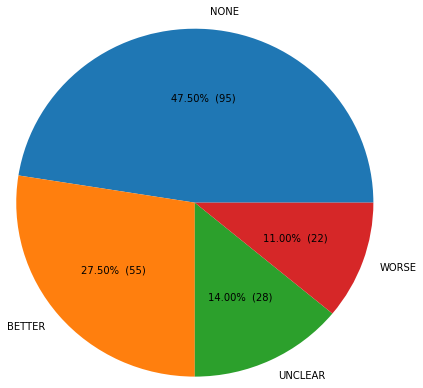

In [85]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


labels = combi['most_frequent_label']
plt.figure(figsize=plt.figaspect(1))
plt.pie(
    labels.value_counts().values,
    labels=labels.value_counts().keys().tolist(),
    radius=2,
    autopct=make_autopct(labels.value_counts().values))
plt.show()

In [97]:
combi[combi.most_frequent_percentage <= 0.5][['sentence', 'object_a','object_b', 'better_count', 'worse_count','other_count', 'none_count']]


,sentence,object_a,object_b,better_count,worse_count,other_count,none_count
45,"Unfortunately, when it comes to potential projects OBJECT_A suffers because it's similarity to OBJECT_B.",Ruby,Python,1,2,1,0
54,OBJECT_A and OBJECT_B perform significantly better.,Python,Ruby,0,0,2,2
67,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better OBJECT_A programmer after spending time in OBJECT_B land.",Python,Ruby,1,0,1,1
138,"See what OBJECT_A or OBJECT_B has to offer "" better smartphones than BlackBerries!",Iphone,Android,0,0,2,2
149,Not to mention that the OBJECT_A and OBJECT_B phones deliver a far superior user experience overall.,Iphone,Android,1,0,1,1
162,Its better specs will make it more competitive against the OBJECT_A 4S and OBJECT_B superphones.,Iphone,Android,0,0,2,2
168,Google shouldn't have mandated an inferior map app on the OBJECT_A (as opposed to OBJECT_B).,Iphone,Android,1,1,0,1
174,"Overall, this is a great phone and definitely better than the OBJECT_A 5 because of its speed, screen size, screen quality, hardware, and OBJECT_B 4.0.4",Iphone,Android,0,2,2,0
